<a href="https://colab.research.google.com/github/vvalcristina/nlp_feedbacks/blob/main/Feedbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Feedbacks 360º**

---

### **Modelagem de tópicos e *Latent Dirichlet Allocation* (LDA) em Python**

A modelagem de tópicos é um tipo de modelagem estatística para descobrir os “tópicos” abstratos que ocorrem em uma coleção de documentos. 
*Latent Dirichlet Allocation* (LDA) é um exemplo de modelo de tópico e é usado para classificar o texto em um documento para um tópico específico.Ele constrói um modelo de tópico por documento e palavras por modelo de tópico, modelado como distribuições de *Dirichlet*.



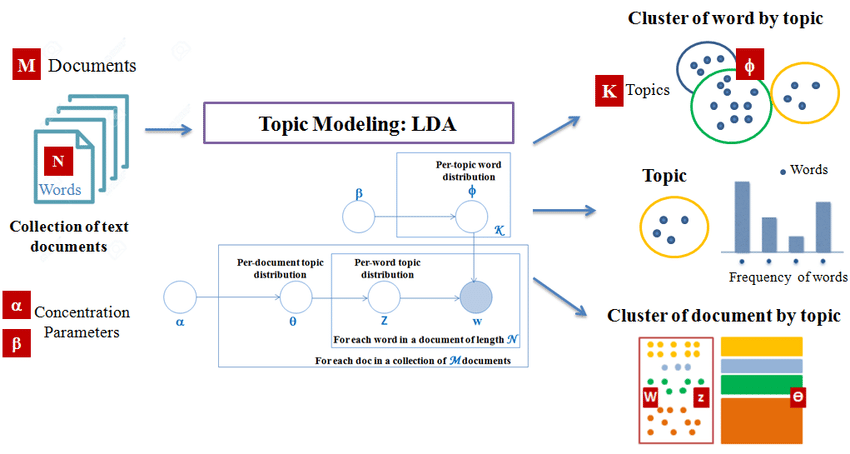

Amara, Amina & Hadj Taieb, Mohamed Ali & Ben Aouicha, Mohamed. (2020). Multilingual topic modelling for tracking COVID-19 trends based on Facebook data analysis. 10.21203/rs.3.rs-45177/v1. 

#### **Os dados**

O conjunto de dados utilizado para análise são os comentários de um forms de feedback coletados para o ciclo de PDP.

In [2]:
import pandas as pd

df = pd.DataFrame(pd.read_csv('/content/feedbacks_valeria_silva.csv'))

In [3]:
data_feedback = df[['Feedbacks']]
data_feedback['index'] = data_feedback.index
df_feedback = data_feedback

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
print(len(df_feedback))
print(df_feedback[:5])

11
                                           Feedbacks  index
0  * "Valéria é uma profissional exemplar, sempre...      0
1  *"Cumpre as suas atividades e auxilia os membr...      1
2  * "Voce sempre esta disposta a ajudar todas as...      2
3  *"Avalio que você ainda se incomoda com as mud...      3
4  *"Tem um relacionamento muito bom o cliente, e...      4


#### **Pré-processamento de dados**

Nessa etapa vamos realizar os seguintes passos:


* **Tokenização** : Divida o texto em frases e as frases em palavras. Diminua as palavras e remova a pontuação.
* Palavras com menos de 3 caracteres são removidas.
* Todas as **palavras irrelevantes** são removidas.
* As palavras são **lematizadas** – palavras em terceira pessoa são alteradas para primeira pessoa e verbos em tempos passados ​​e futuros são alterados para presente.
* As palavras são **derivadas** – as palavras são reduzidas à sua forma raiz.


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
  

In [7]:
doc_sample = df_feedback[df_feedback['index'] == 10].values[0][0]
print('Documento Original: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n Documento Tokenizado e lemantizado: ')
print(preprocess(doc_sample))

Documento Original: 
['*', '"Valéria', 'manda', 'bem', 'acima', 'de', 'tudo', 'pela', 'constância', 'e', 'não', 'somente', 'em', 'um', 'único', 'momento,', 'com', 'excelente', 'habilidades', 'técnicas', 'e', 'disposição', 'para', 'resoluções.', 'm', 'as', 'um', 'momento', 'marcante', 'foi', 'o', 'projeto', 'Anbima', 'Summit,', 'na', 'qual', 'deveríamos', 'desenvolver', 'um', 'projeto', 'streaming', 'de', 'redes', 'sociais', 'em', '4', 'dias,', 'na', 'qual', 'o', 'seu', 'comprometimento', 'e', 'conhecimento', 'fizeram', 'toda', 'diferença', 'para', 'o', 'sucesso', 'do', 'projeto.', '', '"', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

In [8]:
#Salvando os resultados como processed_docs
processed_docs = df_feedback['Feedbacks'].map(preprocess)
processed_docs[:15]

0     [valéria, profission, exemplar, sempr, antenad...
1     [cumpr, sua, atividad, auxilia, membro, time, ...
2     [voce, sempr, esta, disposta, ajudar, toda, pe...
3     [avalio, você, ainda, incomoda, mudança, repen...
4     [relacionamento, muito, client, receb, bon, fe...
5     [valéria, sempr, mostrado, muito, comunicativa...
6     [visão, crítica, sobr, atividad, propõ, melhor...
7     [visualizaçõ, analítica, preza, pela, simplici...
8     [parabén, pela, evolução, técnica, importa, fe...
9     [sobr, visão, negócio, participei, projeto, on...
10    [valéria, manda, acima, tudo, pela, constância...
Name: Feedbacks, dtype: object

Vamos criar um dicionário de 'processed_docs' contendo o número de vezes que uma palavra aparece no conjunto de treinamento.

In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 25:
        break

0 agil
1 alinhada
2 antenada
3 aprendendo
4 apresentando
5 atenta
6 auxiliar
7 busca
8 clara
9 compartilha
10 compartilhando
11 compartilhar
12 compreensão
13 conhecimento
14 constantement
15 curso
16 dado
17 deltalak
18 disposta
19 documentação
20 ensinar
21 evento
22 excelent
23 exemplar
24 ferramenta
25 forma


Vamos filtrar  os tokens que aparecem em menos de 0 documentos (número absoluto) ou mais de 0,5 documentos (fração do tamanho total do corpus, não número absoluto).

Após as duas etapas acima, mantenha apenas os primeiros 20 tokens mais frequentes.

In [10]:
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=20)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

[(2, 3),
 (5, 1),
 (6, 1),
 (8, 2),
 (9, 7),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 1),
 (14, 2),
 (15, 1),
 (18, 2),
 (19, 1)]

In [12]:
bow_doc_4310 = bow_corpus[10]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 2 ("conhecimento") appears 3 time.
Word 5 ("geral") appears 1 time.
Word 6 ("membro") appears 1 time.
Word 8 ("outro") appears 2 time.
Word 9 ("para") appears 7 time.
Word 10 ("profission") appears 1 time.
Word 11 ("referência") appears 1 time.
Word 12 ("também") appears 2 time.
Word 13 ("técnica") appears 1 time.
Word 14 ("valéria") appears 2 time.
Word 15 ("como") appears 1 time.
Word 18 ("pela") appears 2 time.
Word 19 ("mai") appears 1 time.


#### **TF-IDF**

In [13]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.1761781576782116),
 (1, 0.13716949048202573),
 (2, 0.7047126307128464),
 (3, 0.3523563153564232),
 (4, 0.1761781576782116),
 (5, 0.10691201751540559),
 (6, 0.1761781576782116),
 (7, 0.13716949048202573),
 (8, 0.1761781576782116),
 (9, 0.27433898096405146),
 (10, 0.1761781576782116),
 (11, 0.1761781576782116),
 (12, 0.1761781576782116),
 (13, 0.13716949048202573),
 (14, 0.13716949048202573)]


####  **Executando o LDA usando o Bag of Words**

Treinando nosso modelo LDA usando **gensim.models.LdaMulticore** e salve-o em 'lda_model'

In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

Para cada tópico, exploraremos as palavras que ocorrem naquele tópico e seu peso relativo.

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.050*"como" + 0.050*"equip" + 0.050*"pela" + 0.050*"mai" + 0.050*"técnica" + 0.050*"clara" + 0.050*"necessidad" + 0.050*"para" + 0.050*"conhecimento" + 0.050*"valéria"
Topic: 1 
Words: 0.210*"mai" + 0.110*"clara" + 0.110*"demanda" + 0.110*"forma" + 0.110*"necessidad" + 0.110*"geral" + 0.110*"também" + 0.010*"como" + 0.010*"equip" + 0.010*"técnica"
Topic: 2 
Words: 0.138*"equip" + 0.137*"como" + 0.137*"outro" + 0.137*"profission" + 0.137*"disposta" + 0.137*"conhecimento" + 0.013*"pela" + 0.013*"necessidad" + 0.013*"demanda" + 0.013*"mai"
Topic: 3 
Words: 0.061*"para" + 0.053*"valéria" + 0.053*"conhecimento" + 0.053*"também" + 0.052*"outro" + 0.051*"profission" + 0.050*"pela" + 0.050*"como" + 0.050*"referência" + 0.049*"mai"
Topic: 4 
Words: 0.050*"como" + 0.050*"pela" + 0.050*"equip" + 0.050*"técnica" + 0.050*"mai" + 0.050*"para" + 0.050*"clara" + 0.050*"necessidad" + 0.050*"demanda" + 0.050*"conhecimento"
Topic: 5 
Words: 0.207*"como" + 0.207*"demanda" + 0.140*"mai" +


#### **Executando o LDA usando TF-IDF**
---



In [16]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.115*"mai" + 0.104*"para" + 0.089*"necessidad" + 0.085*"busca" + 0.070*"também" + 0.064*"clara" + 0.058*"valéria" + 0.057*"demanda" + 0.049*"técnica" + 0.047*"forma"
Topic: 1 Word: 0.156*"demanda" + 0.126*"como" + 0.111*"para" + 0.111*"mai" + 0.079*"forma" + 0.067*"necessidad" + 0.057*"geral" + 0.022*"técnica" + 0.022*"pela" + 0.022*"equip"
Topic: 2 Word: 0.050*"equip" + 0.050*"mai" + 0.050*"pela" + 0.050*"como" + 0.050*"técnica" + 0.050*"para" + 0.050*"busca" + 0.050*"clara" + 0.050*"disposta" + 0.050*"necessidad"
Topic: 3 Word: 0.050*"pela" + 0.050*"equip" + 0.050*"necessidad" + 0.050*"como" + 0.050*"busca" + 0.050*"clara" + 0.050*"técnica" + 0.050*"demanda" + 0.050*"conhecimento" + 0.050*"mai"
Topic: 4 Word: 0.238*"pela" + 0.132*"técnica" + 0.124*"equip" + 0.124*"clara" + 0.107*"como" + 0.018*"busca" + 0.018*"mai" + 0.018*"necessidad" + 0.018*"para" + 0.018*"disposta"
Topic: 5 Word: 0.050*"pela" + 0.050*"técnica" + 0.050*"clara" + 0.050*"equip" + 0.050*"mai" + 0.050*

In [17]:
pprint(lda_model_tfidf.print_topics())

[(0,
  '0.115*"mai" + 0.104*"para" + 0.089*"necessidad" + 0.085*"busca" + '
  '0.070*"também" + 0.064*"clara" + 0.058*"valéria" + 0.057*"demanda" + '
  '0.049*"técnica" + 0.047*"forma"'),
 (1,
  '0.156*"demanda" + 0.126*"como" + 0.111*"para" + 0.111*"mai" + 0.079*"forma" '
  '+ 0.067*"necessidad" + 0.057*"geral" + 0.022*"técnica" + 0.022*"pela" + '
  '0.022*"equip"'),
 (2,
  '0.050*"equip" + 0.050*"mai" + 0.050*"pela" + 0.050*"como" + 0.050*"técnica" '
  '+ 0.050*"para" + 0.050*"busca" + 0.050*"clara" + 0.050*"disposta" + '
  '0.050*"necessidad"'),
 (3,
  '0.050*"pela" + 0.050*"equip" + 0.050*"necessidad" + 0.050*"como" + '
  '0.050*"busca" + 0.050*"clara" + 0.050*"técnica" + 0.050*"demanda" + '
  '0.050*"conhecimento" + 0.050*"mai"'),
 (4,
  '0.238*"pela" + 0.132*"técnica" + 0.124*"equip" + 0.124*"clara" + '
  '0.107*"como" + 0.018*"busca" + 0.018*"mai" + 0.018*"necessidad" + '
  '0.018*"para" + 0.018*"disposta"'),
 (5,
  '0.050*"pela" + 0.050*"técnica" + 0.050*"clara" + 0.050*"equip"

**Tema Dominante**

Nos modelos LDA, cada documento é composto por váriosn tópicos, mas normalmente um tópico é dominante. Vamos verificar o tópico dominante de cada frase, o peso do tópico e as palavras-chave em uma saída bem formatada.

In [18]:
def format_topics_sentences(ldamodel=None, corpus=corpus_tfidf, texts=dictionary):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Tópico Dominante', 'Percentual de Contribuição', 'Palavras-chaves']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [19]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=dictionary)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Nº do Documento', 'Tópico Dominante', 'Percentual de Contribuição', 'Palavras-chaves', 'Texto']
df_dominant_topic.head(11)

,Nº do Documento,Tópico Dominante,Percentual de Contribuição,Palavras-chaves,Texto
0,0,6.0,0.7867,"para, conhecimento, membro, pela, valéria, dis...",busca
1,1,6.0,0.7728,"para, conhecimento, membro, pela, valéria, dis...",clara
2,2,2.0,0.7364,"equip, como, outro, profission, disposta, conh...",conhecimento
3,3,1.0,0.7449,"mai, clara, demanda, forma, necessidad, geral,...",disposta
4,4,8.0,0.7106,"necessidad, mai, clara, demanda, para, como, p...",forma
5,5,9.0,0.6783,"busca, técnica, equip, pela, valéria, como, ma...",geral
6,6,0.0,0.1000,"como, equip, pela, mai, técnica, clara, necess...",membro
7,7,6.0,0.6705,"para, conhecimento, membro, pela, valéria, dis...",necessidad
8,8,9.0,0.6692,"busca, técnica, equip, pela, valéria, como, ma...",outro
9,9,5.0,0.7387,"como, demanda, mai, para, forma, geral, necess...",para


**A frase mais representativa para cada tópico**

In [20]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Tópico Dominante')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Percentual de Contribuição'], ascending=False).head(1)], 
                                            axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Nº do Tópico', "Percentual de Contribuição", "Palavras-chaves", "Texto Representativo"]

sent_topics_sorteddf_mallet.head(10)

,Nº do Tópico,Percentual de Contribuição,Palavras-chaves,Texto Representativo
0,0.0,0.1000,"como, equip, pela, mai, técnica, clara, necessidad, para, conhecimento, valéria",membro
1,1.0,0.7449,"mai, clara, demanda, forma, necessidad, geral, também, como, equip, técnica",disposta
2,2.0,0.7364,"equip, como, outro, profission, disposta, conhecimento, pela, necessidad, demanda, mai",conhecimento
3,5.0,0.7387,"como, demanda, mai, para, forma, geral, necessidad, equip, técnica, clara",para
4,6.0,0.7867,"para, conhecimento, membro, pela, valéria, disposta, equip, geral, referência, como",busca
5,8.0,0.7106,"necessidad, mai, clara, demanda, para, como, pela, equip, técnica, valéria",forma
6,9.0,0.6783,"busca, técnica, equip, pela, valéria, como, mai, demanda, para, clara",geral


In [23]:
import matplotlib.pyplot as plt

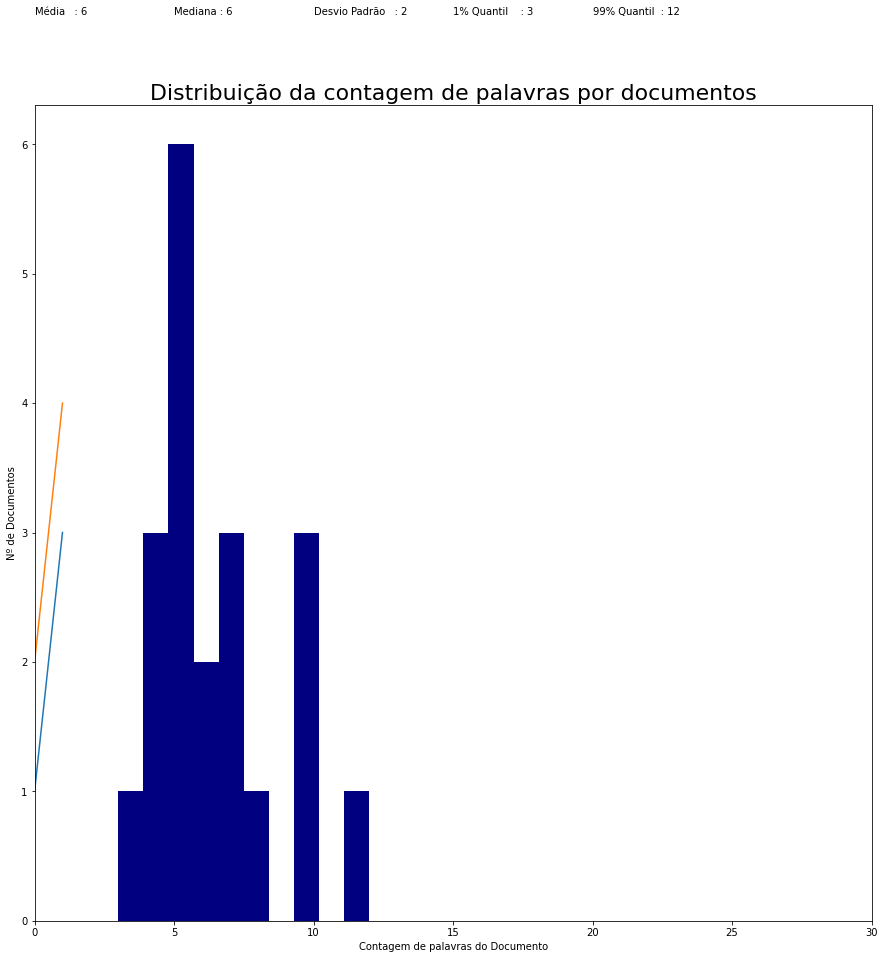

In [41]:
doc_lens = [len(d) for d in df_dominant_topic.Texto]

plt.rcParams["figure.figsize"] = (15, 15)
plt.plot([[1,2], [3, 4]])
plt.hist(doc_lens, bins = 10, color='navy')
plt.text(0, 7, "Média   : " + str(round(np.mean(doc_lens))))
plt.text(5,  7, "Mediana : " + str(round(np.median(doc_lens))))
plt.text(10,  7, "Desvio Padrão   : " + str(round(np.std(doc_lens))))
plt.text(15,  7, "1% Quantil    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(20,  7, "99% Quantil  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 30), ylabel='Nº de Documentos', xlabel='Contagem de palavras do Documento')
plt.tick_params()
plt.xticks()
plt.title('Distribuição da contagem de palavras por documentos', fontdict=dict(size=22))
plt.show()

**Wordcloud**

In [42]:
!pip install wordcloud

In [43]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['para','pela','mai','como','valéria'])

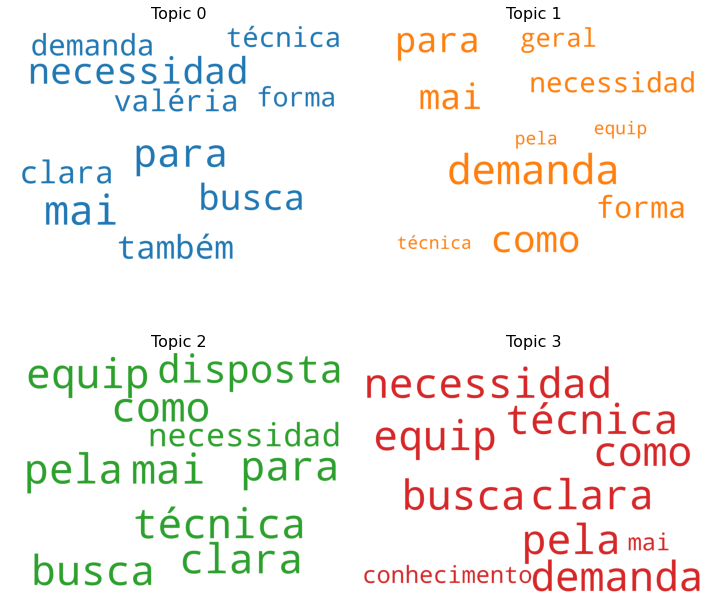

In [45]:
# 1. Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_tfidf.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Contagem de palavras-chave**

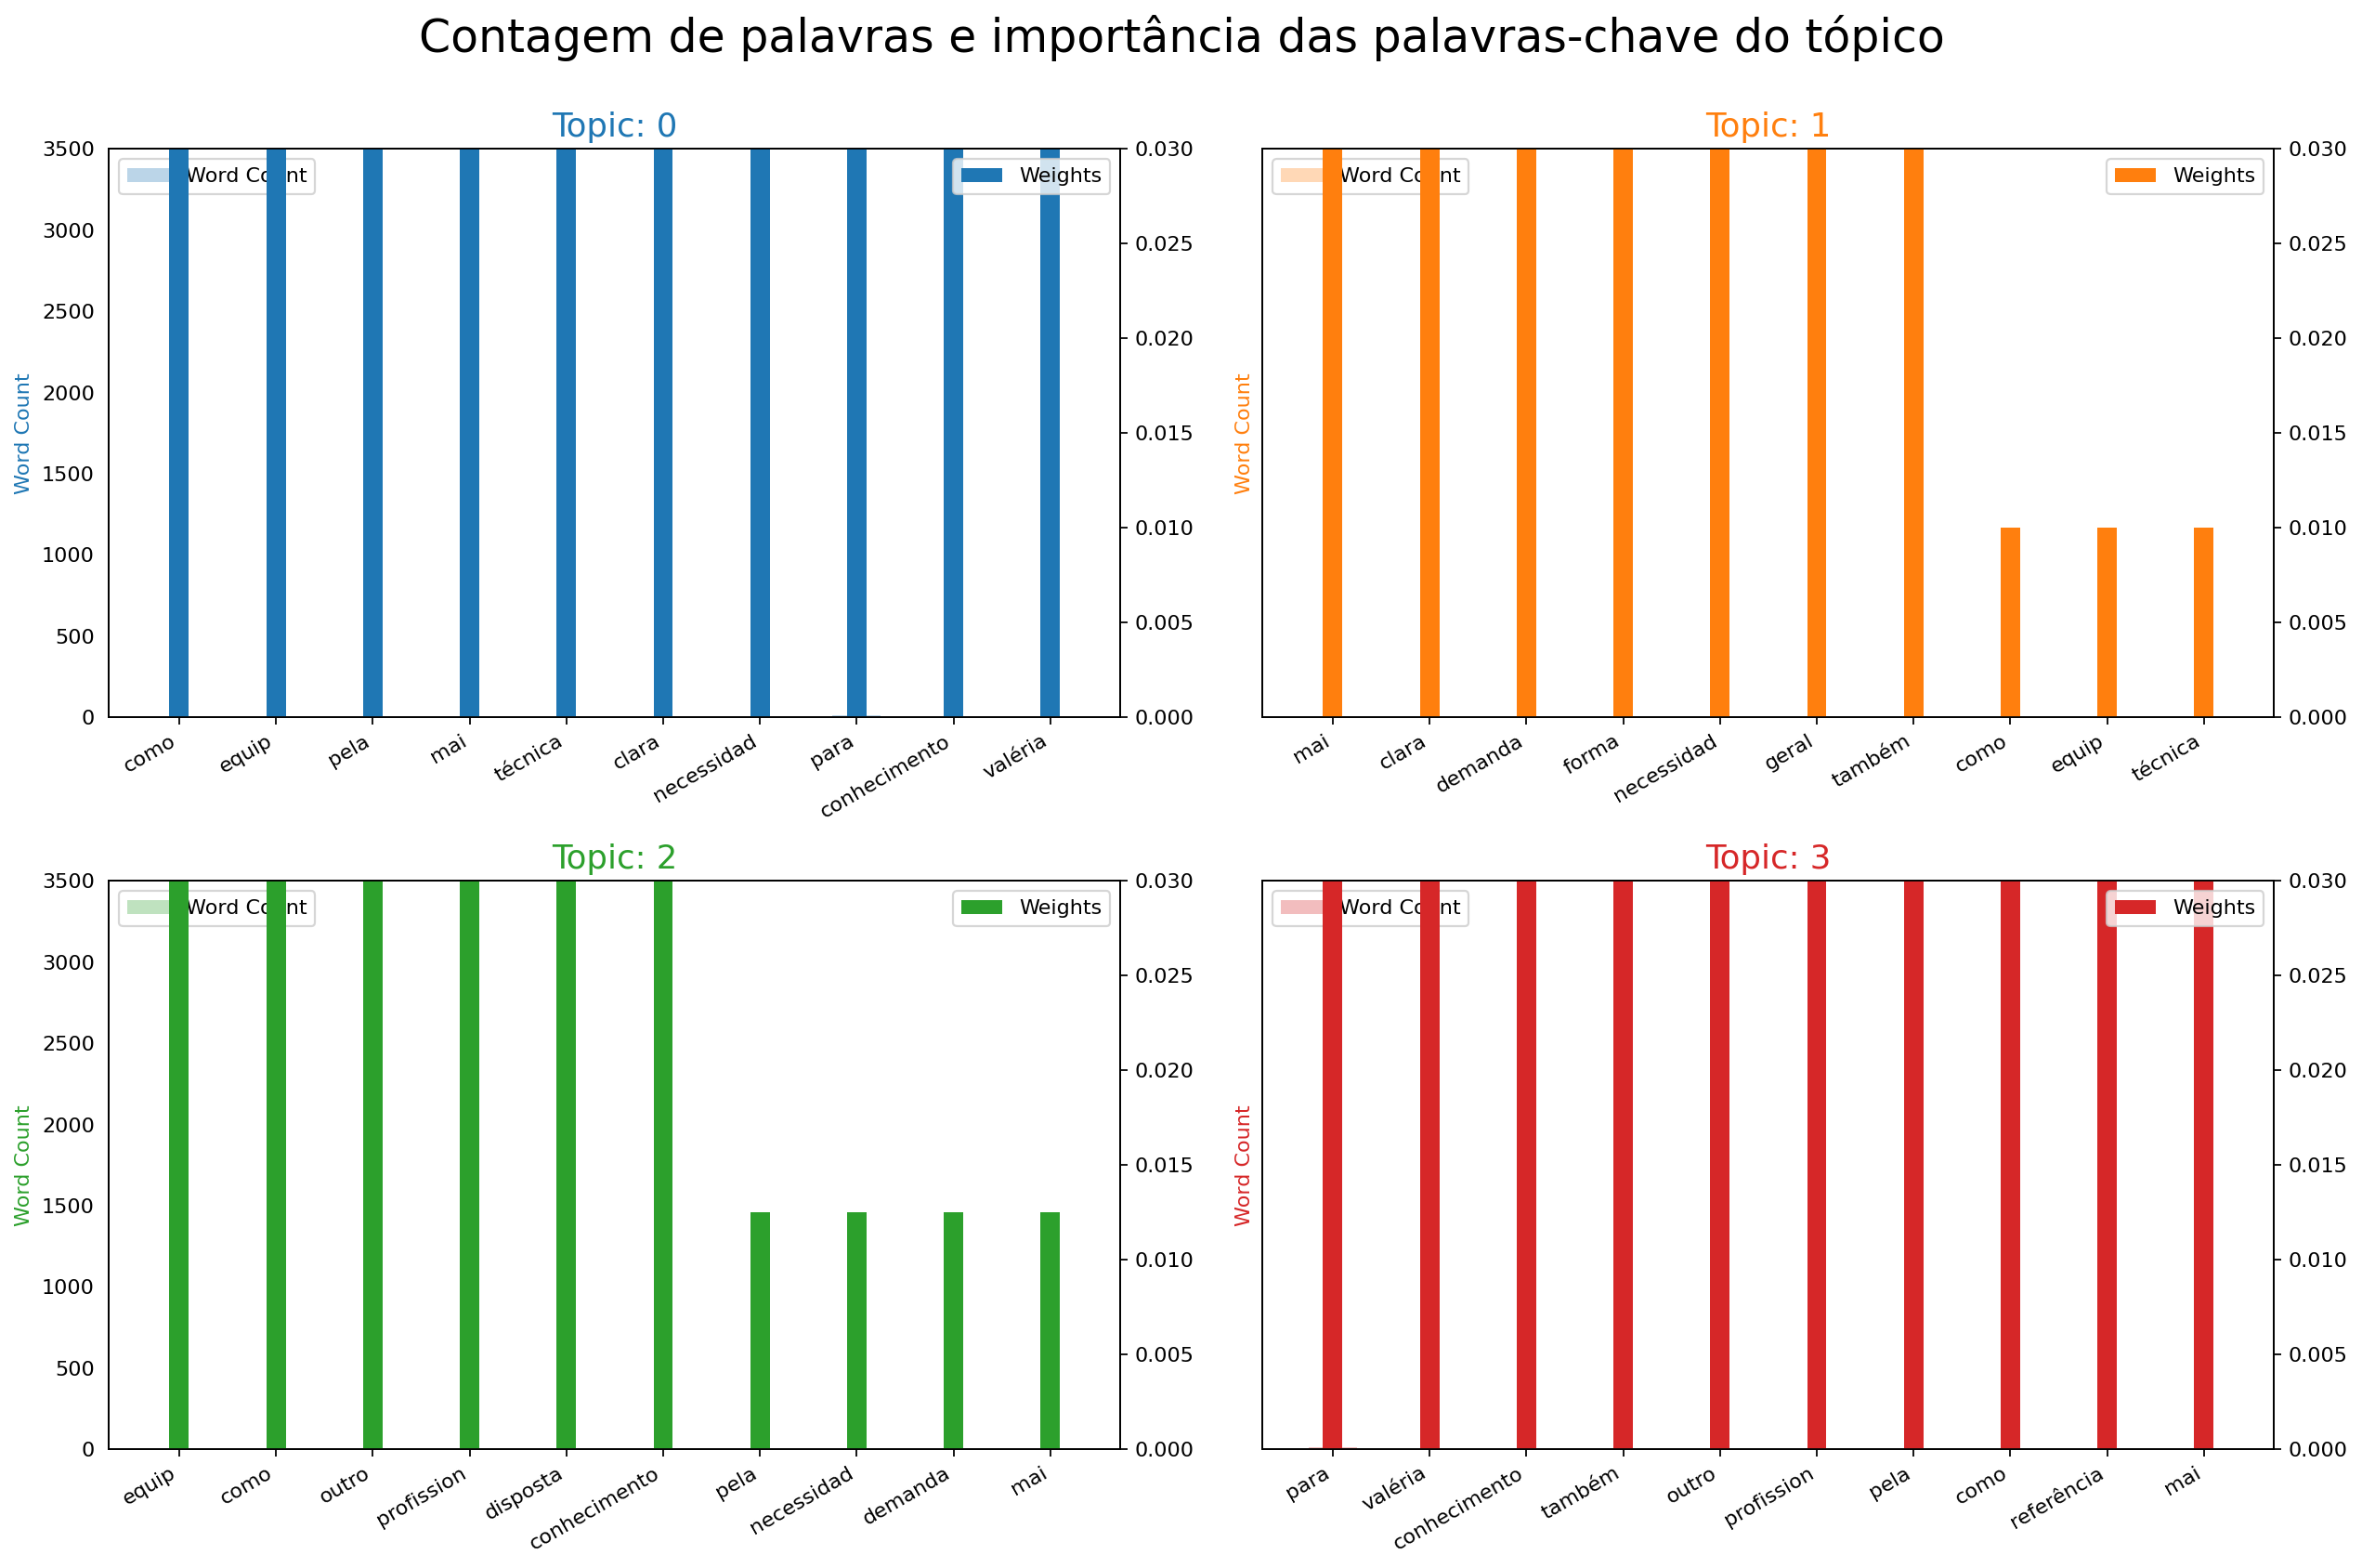

In [48]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Contagem de palavras e importância das palavras-chave do tópico', fontsize=22, y=1.05)    
plt.show()

**Referências**:

* [Topic Modeling and Latent Dirichlet Allocation (LDA) in Python](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)
* [NLTK](https://www.nltk.org/howto/stem.html)
* [Topic modeling visualization – How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)